## **Dataset Name:**

Caltech-UCSD Birds-200-2011 (CUB-200-2011)

## **Source (Kaggle):**

https://www.kaggle.com/datasets/veeralakrishna/200-bird-species-with-11788-images

## **Description:**

The CUB-200-2011 dataset is an extended and improved version of the original CUB-200 dataset. It is widely used for fine-grained visual classification (FGVC) tasks — identifying subtle differences among bird species. Each image is labeled with its species, and annotations include bounding boxes, segmentations, and part locations (e.g., beak, wings, tail).

In [17]:
!nvidia-smi

Wed Oct 22 15:14:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   71C    P0             29W /   70W |    2170MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [18]:
!pip install -q kaggle

In [19]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chandanchaudhari","key":"6d5a3ab6210e333ed6c92c785566b15e"}'}

In [20]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
!kaggle datasets download -d veeralakrishna/200-bird-species-with-11788-images
!unzip -q 200-bird-species-with-11788-images.zip -d birds_dataset

Dataset URL: https://www.kaggle.com/datasets/veeralakrishna/200-bird-species-with-11788-images
License(s): CC0-1.0
200-bird-species-with-11788-images.zip: Skipping, found more recently modified local copy (use --force to force download)
replace birds_dataset/CUB_200_2011.tgz? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [22]:
!unzip -q 200-bird-species-with-11788-images.zip -d birds_dataset
!ls birds_datasetn

replace birds_dataset/CUB_200_2011.tgz? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
ls: cannot access 'birds_datasetn': No such file or directory


In [23]:
!tar -xzf birds_dataset/CUB_200_2011.tgz -C birds_dataset
!ls birds_dataset/CUB_200_2011

attributes	    image_class_labels.txt  parts
bounding_boxes.txt  images		    README
classes.txt	    images.txt		    train_test_split.txt


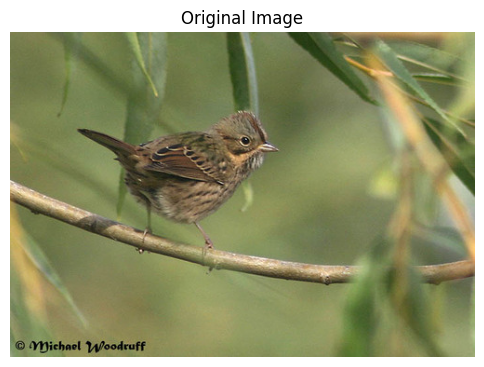

Image Shape (Height, Width, Channels): (350, 500, 3)


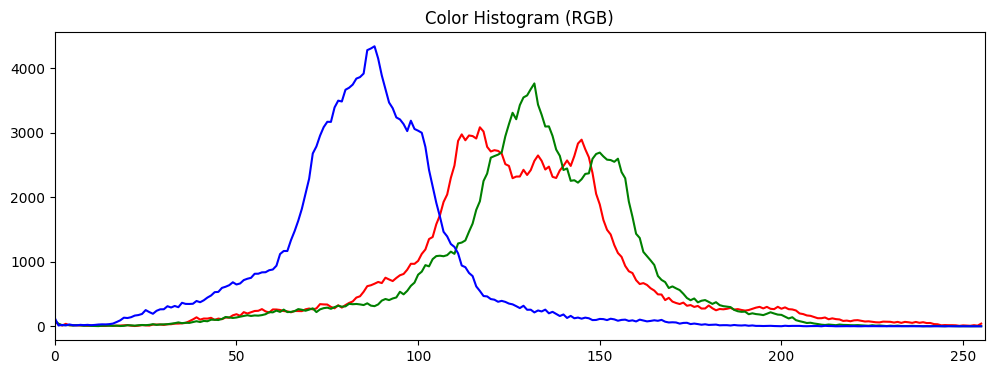

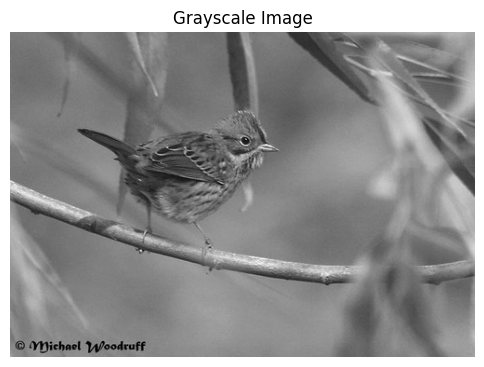

Min Pixel Value: 0
Max Pixel Value: 255
Mean Pixel Value: 115.29333142857143


In [24]:
# -----------------------------
      # Image Processing
# -----------------------------
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Image Analysis
sample_image_path = os.path.join(src, os.listdir(src)[0], os.listdir(os.path.join(src, os.listdir(src)[0]))[0])

# Loading an image using OpenCV
img = cv2.imread(sample_image_path)  # BGR format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Original image
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Image shape
print("Image Shape (Height, Width, Channels):", img.shape)

# Color channels analysis
plt.figure(figsize=(12,4))
colors = ('r','g','b')
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.title("Color Histogram (RGB)")
plt.show()

# Convert to grayscale and show
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Pixel intensity statistics
print("Min Pixel Value:", np.min(img_rgb))
print("Max Pixel Value:", np.max(img_rgb))
print("Mean Pixel Value:", np.mean(img_rgb))

Found 11317 files belonging to 200 classes.
Found 4277 files belonging to 200 classes.
Epoch 1/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - accuracy: 0.0039 - loss: 49.6235 - val_accuracy: 0.0159 - val_loss: 5.2782
Epoch 2/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 33s 93ms/step - accuracy: 0.0226 - loss: 5.2460 - val_accuracy: 0.0276 - val_loss: 5.2243
Epoch 3/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - accuracy: 0.0398 - loss: 5.1057 - val_accuracy: 0.0715 - val_loss: 5.0005
Epoch 4/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.0886 - loss: 4.8005 - val_accuracy: 0.1012 - val_loss: 4.8457
Epoch 5/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.1848 - loss: 4.3178 - val_accuracy: 0.1503 - val_loss: 4.7606
Epoch 6/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.2877 - loss: 3.7564 - val_accuracy: 0.1908 - val_loss: 4.5615
Epoch 7/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.3751 - loss: 3.2910 - val_accuracy: 0.2095 - val_loss: 

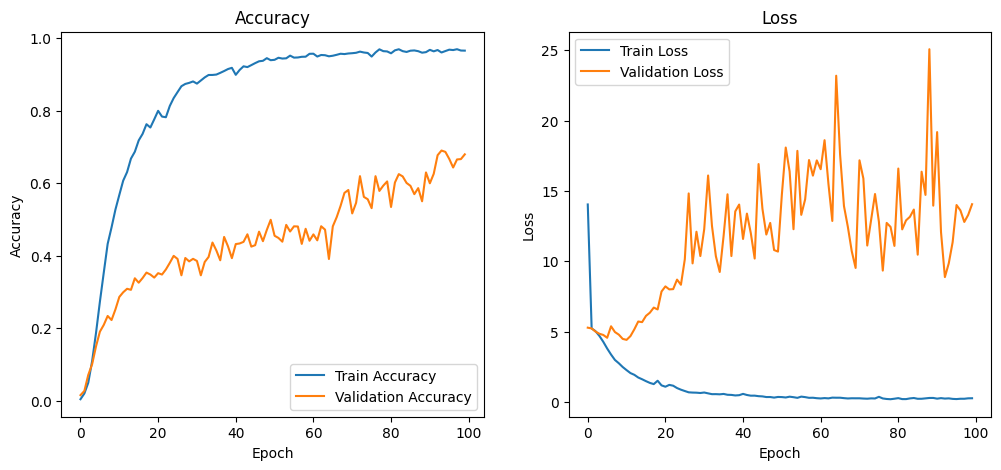

In [16]:
# -----------------------------
    # Model Building
# -----------------------------

import tensorflow as tf
from tensorflow import keras
import os, shutil, random
import matplotlib.pyplot as plt

# Step 1: Define Paths
src = "birds_dataset/CUB_200_2011/images"
train_dir = "birds_dataset/train"
test_dir = "birds_dataset/test"

# Step 2: Create train/test folders automatically

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for cls in os.listdir(src):
    os.makedirs(f"{train_dir}/{cls}", exist_ok=True)
    os.makedirs(f"{test_dir}/{cls}", exist_ok=True)
    images = os.listdir(f"{src}/{cls}")
    random.shuffle(images)
    split = int(0.8 * len(images))  # 80% train, 20% test

    for img in images[:split]:
        shutil.copy(f"{src}/{cls}/{img}", f"{train_dir}/{cls}/")
    for img in images[split:]:
        shutil.copy(f"{src}/{cls}/{img}", f"{test_dir}/{cls}/")

# Step 3: Load datasets
img_size = (224, 224)
batch_size = 32

train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Step 4: Build simple CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(200, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train
history = model.fit(train_ds, validation_data=test_ds, epochs=100)

# Step 6: Evaluate
model.evaluate(test_ds)

# Step 7: Plot Accuracy & Loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        51,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,888,218 (255.16 MB)

 Trainable params: 22,296,072 (85.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,592,146 (170.11 MB)